### Iris

In [ ]:
#%pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# 1. Завантаження набору даних Iris (скористаємося sklearn)
iris = load_iris()
X = iris.data
y = iris.target

# Перетворення міток у one-hot (якщо потрібно)
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)


In [ ]:
y_onehot

In [4]:

# Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled.shape

In [ ]:

# Розподіл на тренувальні/тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot,
                                                    test_size=0.2,
                                                    random_state=42)

# 2. Створення моделі (MLP)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 класи

# 3. Компіляція
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# 4. Навчання
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=8,
                    verbose=1)


In [ ]:

# 5. Оцінка
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:

# 6. Прогноз
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("Predicted classes:", predicted_classes[:20])
print("True classes:     ", true_classes[:20])

### MNIST

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [42]:
x_train.shape

(60000, 28, 28)

In [43]:

# 2. Попередня обробка
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot для міток
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


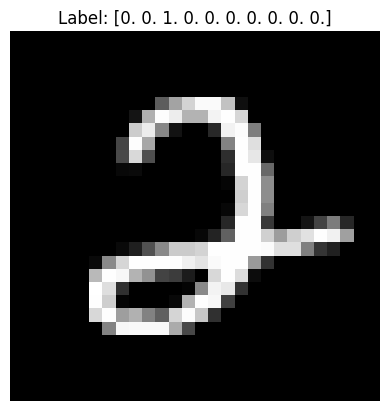

In [44]:
import matplotlib.pyplot as plt

index = 16
# Display the first image in the dataset
plt.imshow(x_train[index], cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()


In [45]:

# 3. Створення моделі (CNN)
model = models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Компіляція
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:

# 5. Навчання
model.fit(x_train, y_train, 
          validation_split=0.1,
          epochs=5, 
          batch_size=32)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8404 - loss: 0.5389 - val_accuracy: 0.9743 - val_loss: 0.0916
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9691 - loss: 0.0979 - val_accuracy: 0.9805 - val_loss: 0.0756
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9777 - loss: 0.0725 - val_accuracy: 0.9847 - val_loss: 0.0564
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9858 - val_loss: 0.0529
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9863 - loss: 0.0443 - val_accuracy: 0.9872 - val_loss: 0.0496


In [47]:

# 6. Оцінка
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9860


In [48]:

# 7. Приклад передбачення
import numpy as np
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

print("Predicted classes:", predicted_classes)
print("Real classes:     ", true_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted classes: [7 2 1 0 4]
Real classes:      [7 2 1 0 4]
